In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
# %matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from collections import Counter

In [220]:
raw = pd.read_excel('seoul_weather_1Y.xlsx')

In [221]:
raw.columns = pd.Index(['datetime','temp', 'precipitation', 'wind_speed', 'wind_deg', 'humidity',
       'pressure', 'suntime', 'clouds'],
      dtype='object')

In [222]:
raw.set_index('datetime', inplace=True)

In [223]:
raw['precipitation'] = raw['precipitation'].fillna(0)
raw['clouds'] = raw['clouds'].fillna(0)
raw['suntime'] = raw['suntime'].fillna(0)

In [242]:
raw.describe()

,temp,precipitation,wind_speed,wind_deg,humidity,pressure,suntime,clouds
count,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000,8733.000000
mean,13.400321,0.112207,1.732795,199.559143,55.032635,1006.478598,0.306641,4.422077
std,11.242819,0.956077,1.028190,113.829261,20.509067,8.190176,0.433830,4.041672
min,-14.200000,0.000000,0.000000,0.000000,10.000000,980.800000,0.000000,0.000000
25%,4.200000,0.000000,1.000000,90.000000,39.000000,1000.300000,0.000000,0.000000
50%,13.100000,0.000000,1.500000,250.000000,54.000000,1006.300000,0.000000,4.000000
75%,22.700000,0.000000,2.400000,290.000000,71.000000,1012.800000,0.900000,9.000000
max,39.400000,29.500000,7.000000,360.000000,98.000000,1028.300000,1.000000,10.000000


In [243]:
raw_mean = raw.describe().loc['mean']
raw_std = raw.describe().loc['std']

In [225]:
raw.dropna(inplace=True)

In [226]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8733 entries, 2018-06-01 01:00:00 to 2019-05-31 00:00:00
Data columns (total 8 columns):
temp             8733 non-null float64
precipitation    8733 non-null float64
wind_speed       8733 non-null float64
wind_deg         8733 non-null float64
humidity         8733 non-null int64
pressure         8733 non-null float64
suntime          8733 non-null float64
clouds           8733 non-null float64
dtypes: float64(7), int64(1)
memory usage: 614.0 KB


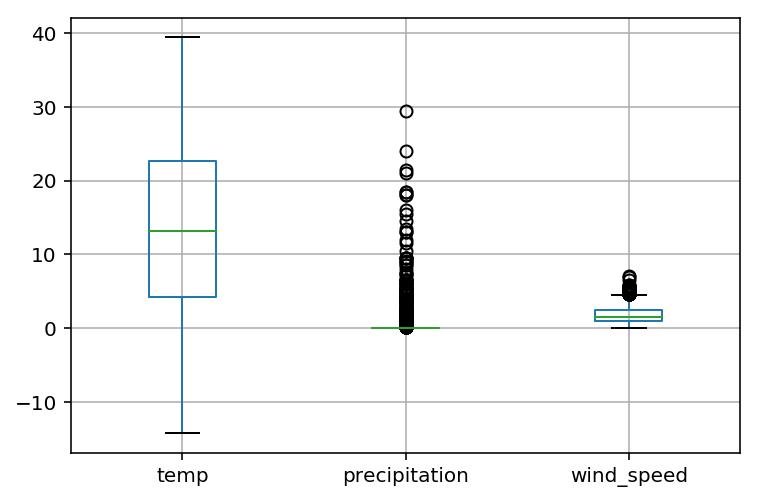

In [227]:
raw.iloc[:,:3].boxplot()

In [397]:
data.columns

Index(['temp', 'precipitation', 'wind_speed', 'clouds', 'humidity'], dtype='object')

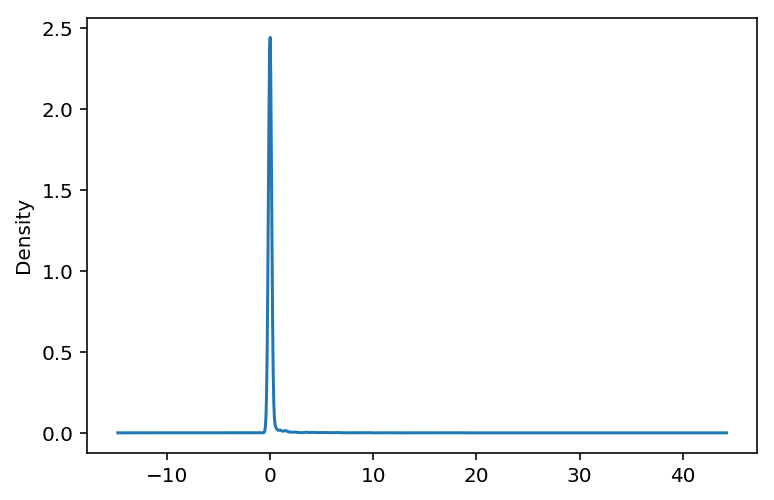

In [395]:
raw.precipitation.plot.density()

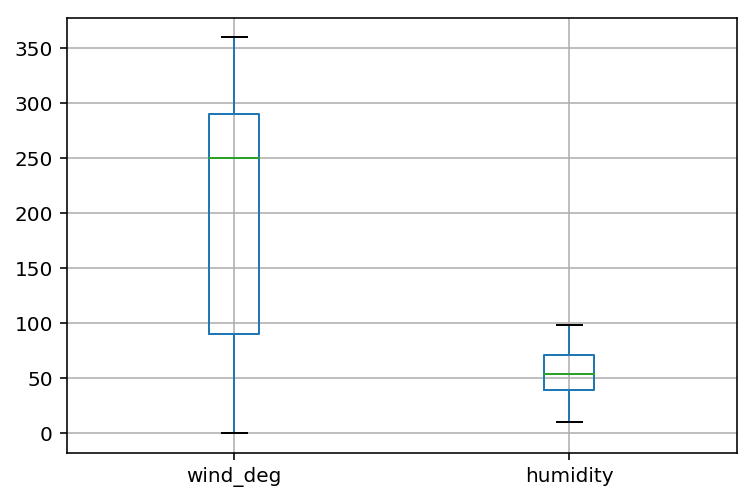

In [228]:
raw.iloc[:,3:5].boxplot()

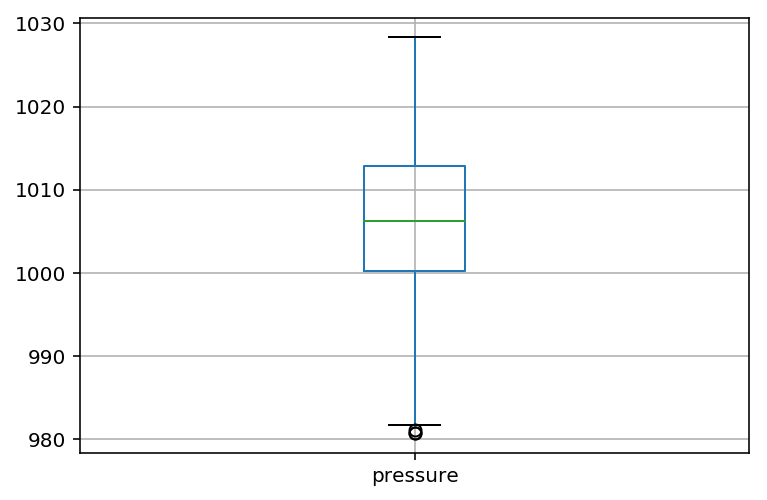

In [229]:
raw.iloc[:,5:6].boxplot()

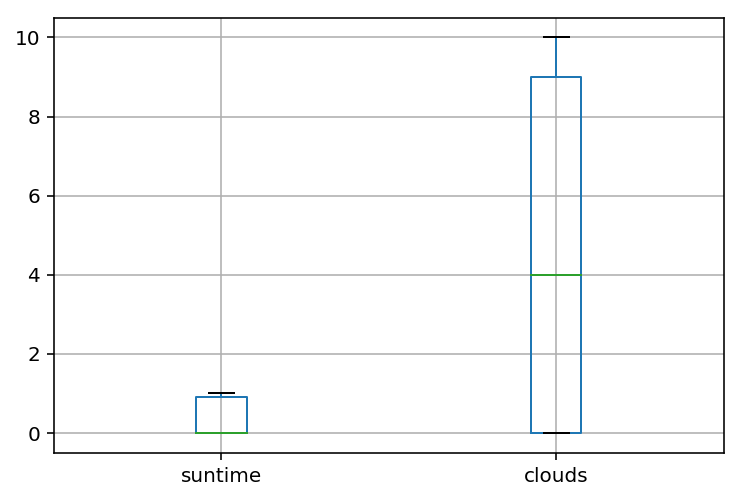

In [230]:
raw.iloc[:,6:].boxplot()

## K-means clustering

In [231]:
raw.columns

Index(['temp', 'precipitation', 'wind_speed', 'wind_deg', 'humidity',
       'pressure', 'suntime', 'clouds'],
      dtype='object')

In [232]:
data = raw[['temp','precipitation','wind_speed','clouds','humidity']]

In [233]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

Text(0,0.5,'Distortion')

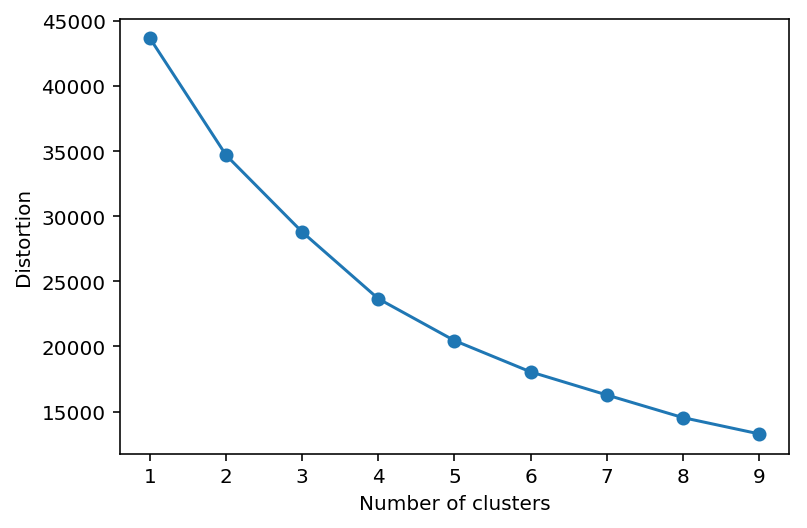

In [234]:
# WSS plot
plt.figure()
distortions = [] 
for k in range(1,10):
    km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [236]:
#silhouette_score도 찍어본다
for k in range(2,10):
    km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 300,
               random_state=0).fit(X)
    print("score for %d clusters:%.3f" % (k, silhouette_score(X, km.labels_)))

score for 2 clusters:0.220
score for 3 clusters:0.227
score for 4 clusters:0.238
score for 5 clusters:0.234
score for 6 clusters:0.247
score for 7 clusters:0.237
score for 8 clusters:0.244
score for 9 clusters:0.245


In [239]:
def clustering(k, X):
    km = KMeans(n_clusters=k
                ,init='k-means++'
               ,n_init = 100
               ,max_iter = 300
               ,random_state=0
               ).fit(X)
    y = km.predict(X)
    km_center = km.cluster_centers_
    return pd.DataFrame(data=km_center,columns=data.columns), y, Counter(y)

In [240]:
centroid, cluster, cluster_count = clustering(9, X)
print(cluster_count)
centroid

Counter({1: 1507, 2: 1289, 7: 1252, 4: 1235, 5: 1228, 6: 1152, 0: 975, 8: 79, 3: 16})


,temp,precipitation,wind_speed,clouds,humidity
0,-0.581533,-0.115435,1.655041,-0.640211,-1.095025
1,0.210980,0.063166,-0.473813,1.119938,1.224926
2,0.089640,-0.117368,-0.807594,-0.872086,0.824331
3,0.645976,18.056890,0.010655,1.380182,2.043353
4,-0.689847,-0.116267,-0.313924,0.906947,-0.553961
5,1.019882,-0.117368,0.265443,-0.803793,-0.457813
6,0.972412,-0.100041,0.610398,0.890245,-0.110533
7,-1.141814,-0.117368,-0.375310,-0.981227,-0.523026
8,0.413311,5.438351,-0.363087,1.355125,1.949494


In [252]:
raw_centroid = {}
for col in centroid.columns:
    raw_centroid[col] = centroid[col] * raw_std[col]
raw_centroid = pd.DataFrame.from_dict(raw_centroid)
raw_centroid

,temp,precipitation,wind_speed,clouds,humidity
0,-6.538067,-0.110365,1.701697,-2.587523,-22.457945
1,2.372012,0.060391,-0.487169,4.526424,25.122088
2,1.007805,-0.112213,-0.830360,-3.524684,16.906270
3,7.262595,17.263782,0.010955,5.578242,41.907265
4,-7.755825,-0.111160,-0.322773,3.665582,-11.361221
5,11.466351,-0.112213,0.272925,-3.248669,-9.389326
6,10.932656,-0.095647,0.627605,3.598077,-2.266936
7,-12.837209,-0.112213,-0.385890,-3.965800,-10.726785
8,4.646781,5.199484,-0.373323,5.476971,39.982313


## visualization

In [253]:
from sklearn.manifold import TSNE
from plotnine import *
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [255]:
tsne_result = TSNE(init='pca').fit_transform(X)

In [256]:
df_tsne_result = pd.DataFrame(tsne_result, columns=['v1','v2']).assign(clusters=cluster)

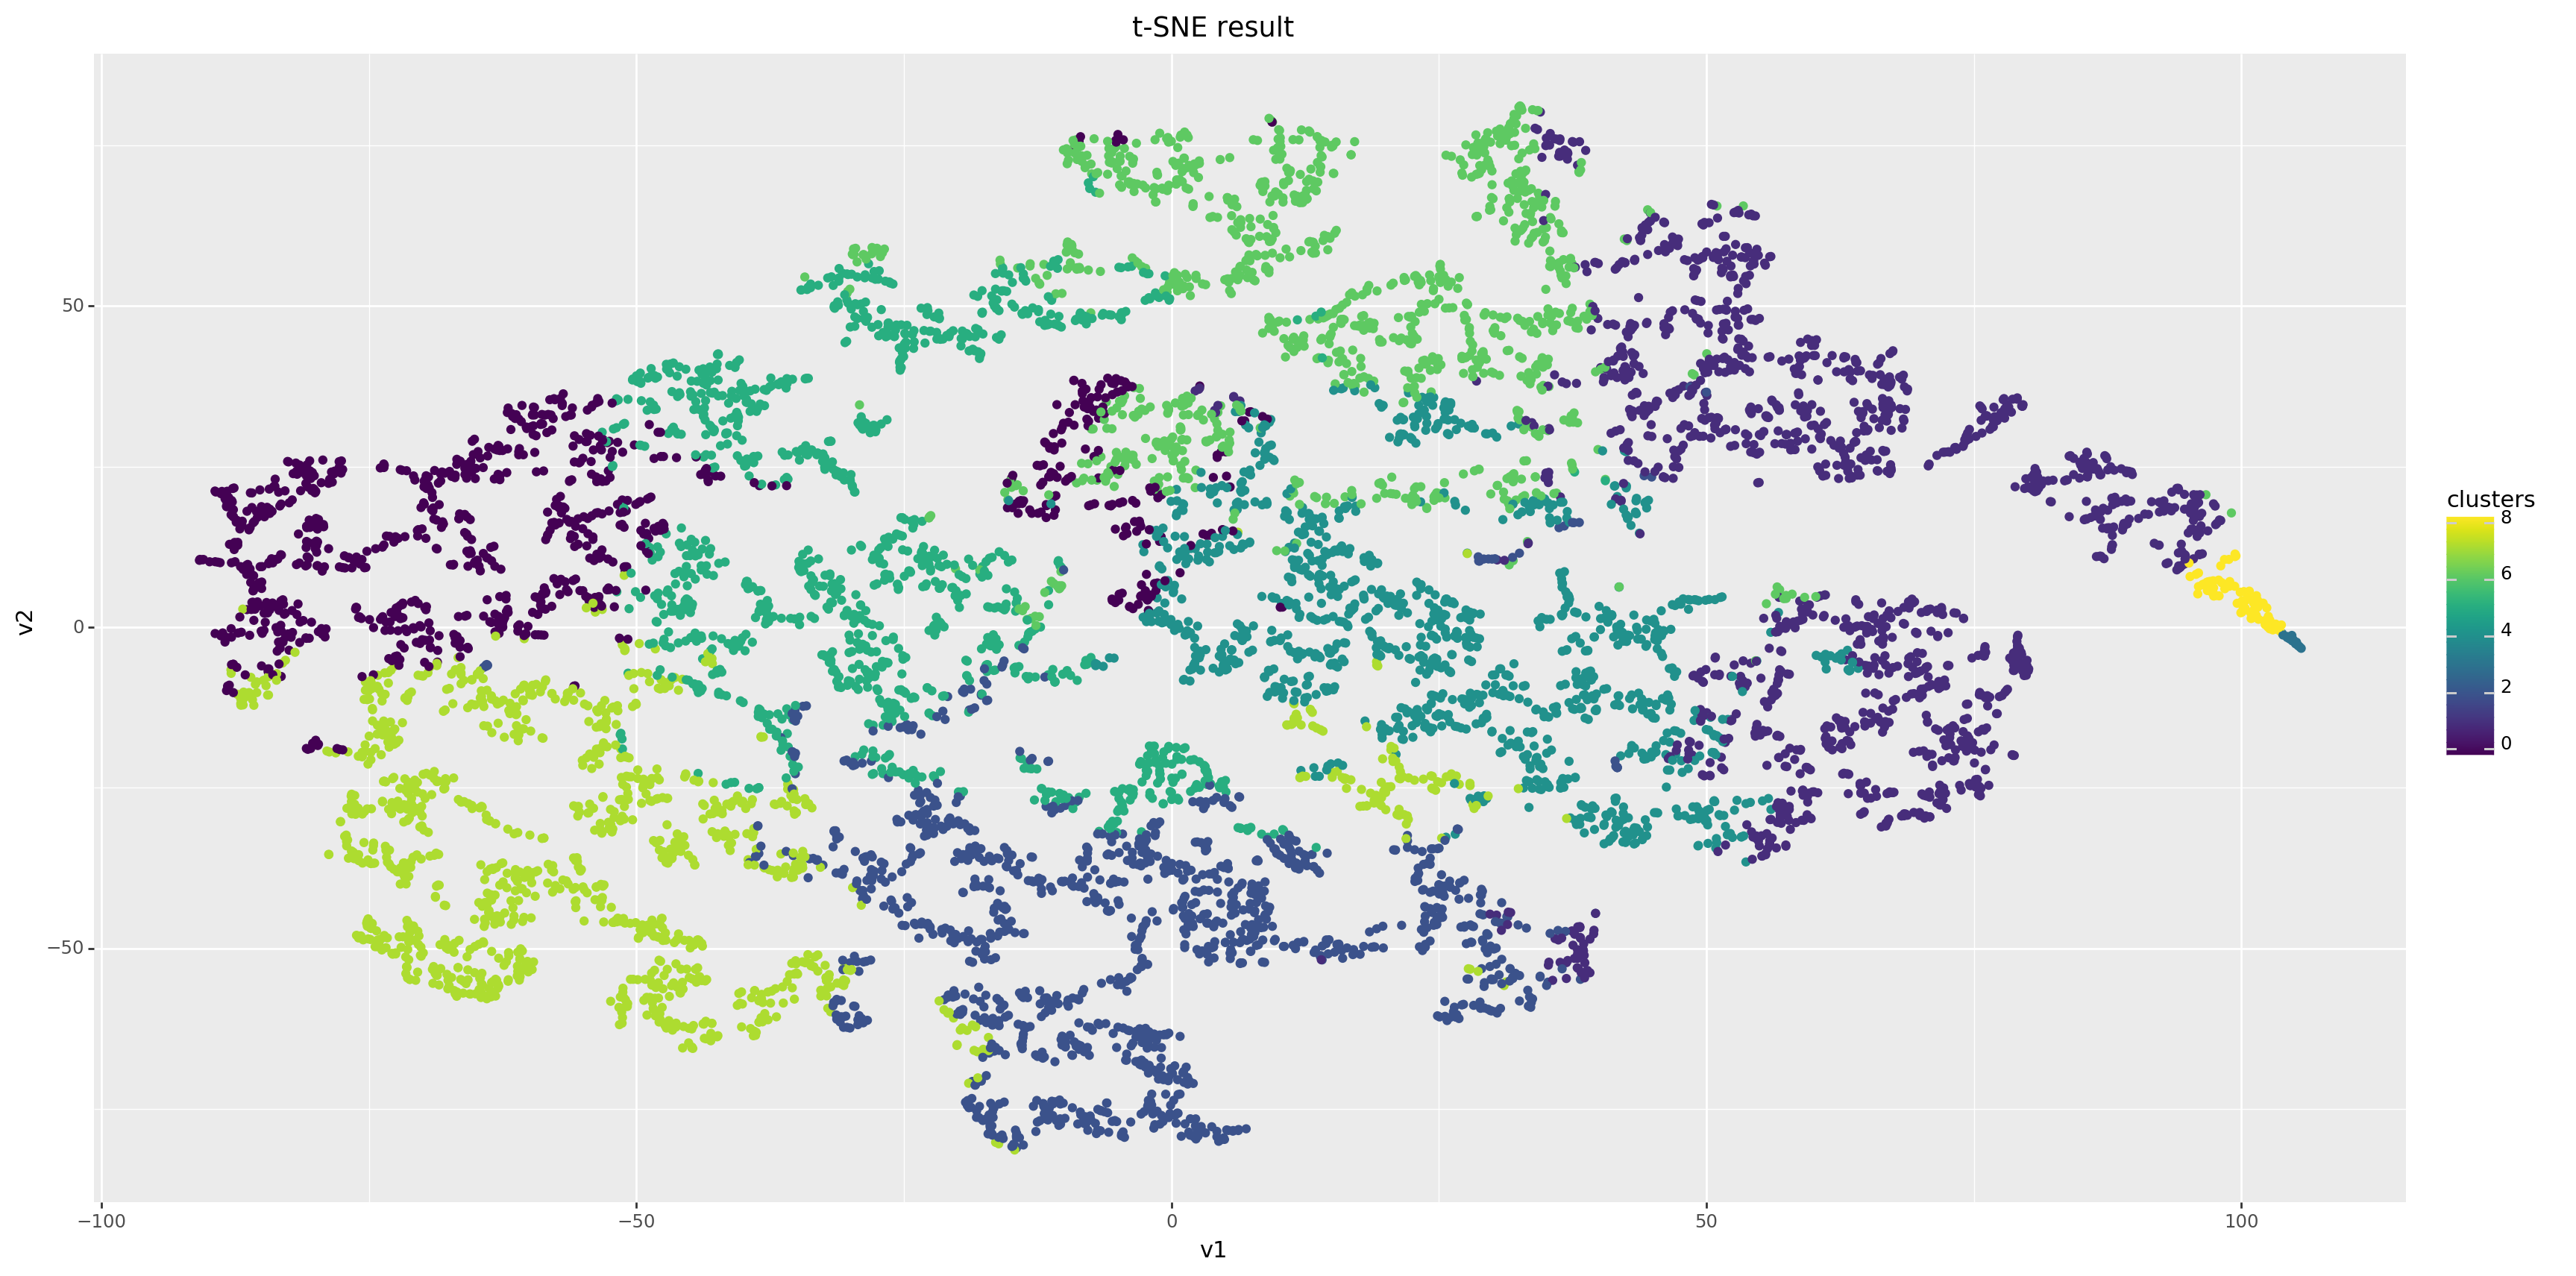

<ggplot: (-9223363249228816843)>

In [257]:
ggplot(df_tsne_result, aes('v1','v2', color='clusters')) + geom_point() + ggtitle('t-SNE K-means result') + theme(figure_size=(20, 10))

## DBSCAN

In [258]:
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

In [379]:
dbscan_result = DBSCAN(eps=2.5, min_samples=7).fit_predict(tsne_result)

In [380]:
df_dbscan_result = pd.DataFrame(data=tsne_result, columns=['v1','v2']).assign(cluster = dbscan_result)

In [381]:
df_dbscan_result.cluster = df_dbscan_result.cluster.astype('category')

In [382]:
df_dbscan_X = pd.concat([df_dbscan_result, data.reset_index()], axis=1)

In [388]:
df_dbscan_X[df_dbscan_X.cluster == 0].describe()

,v1,v2,temp,precipitation,wind_speed,clouds,humidity
count,2388.000000,2388.000000,2388.000000,2388.0,2388.000000,2388.000000,2388.000000
mean,-27.619858,-25.468456,14.346064,0.0,1.457161,0.581240,55.067002
std,23.429533,26.593899,9.015348,0.0,0.783990,1.173874,18.570570
min,-80.850533,-81.376083,-12.500000,0.0,0.000000,0.000000,13.000000
25%,-46.737508,-44.312905,7.500000,0.0,0.900000,0.000000,41.000000
50%,-24.312236,-23.119817,14.400000,0.0,1.400000,0.000000,55.000000
75%,-8.106270,-3.377957,21.300000,0.0,2.000000,1.000000,71.000000
max,19.803503,22.689959,35.200000,0.0,4.100000,6.000000,98.000000


In [384]:
df_dbscan_X.groupby('cluster').mean()

,v1,v2,temp,precipitation,wind_speed,clouds,humidity
cluster,,,,,,,
-1,33.480026,8.364955,14.425000,0.155000,1.625000,7.100000,59.700000
0,-27.619864,-25.468496,14.346064,0.000000,1.457161,0.581240,55.067002
1,-45.374268,31.634136,24.029217,0.000000,3.079518,0.493976,36.409639
2,-6.600340,59.462090,30.689760,0.001120,2.515840,5.347200,47.032000
3,33.012257,-27.795879,5.598212,0.001341,0.868256,6.131148,58.523100
4,40.062809,44.996960,23.335930,0.016080,1.405611,8.619765,64.634841
5,-21.920668,0.098271,22.272727,0.000000,1.409091,2.363636,45.636364
6,34.151535,20.277296,17.682857,0.000000,1.380000,6.471429,55.600000
7,-10.489442,-26.864901,22.773333,0.000000,1.833333,0.133333,66.200000


In [385]:
c = Counter(df_dbscan_result.cluster)

In [386]:
c.most_common()[:5]

[(0, 2388), (4, 1194), (17, 921), (3, 671), (2, 625)]

In [387]:
c.most_common()[-5:]

[(9, 16), (8, 13), (5, 11), (16, 8), (30, 7)]

In [293]:
def group_chull(df):
    ch = ConvexHull(df.loc[:, ['v1', 'v2']].values)
    return df.iloc[ch.vertices, :]

df_chull_result = (df_dbscan_result
 .groupby('cluster', as_index=False, group_keys=False)
 .apply(group_chull)
 .reset_index(drop=True)
 .loc[:, ['v1', 'v2', 'cluster']]
)

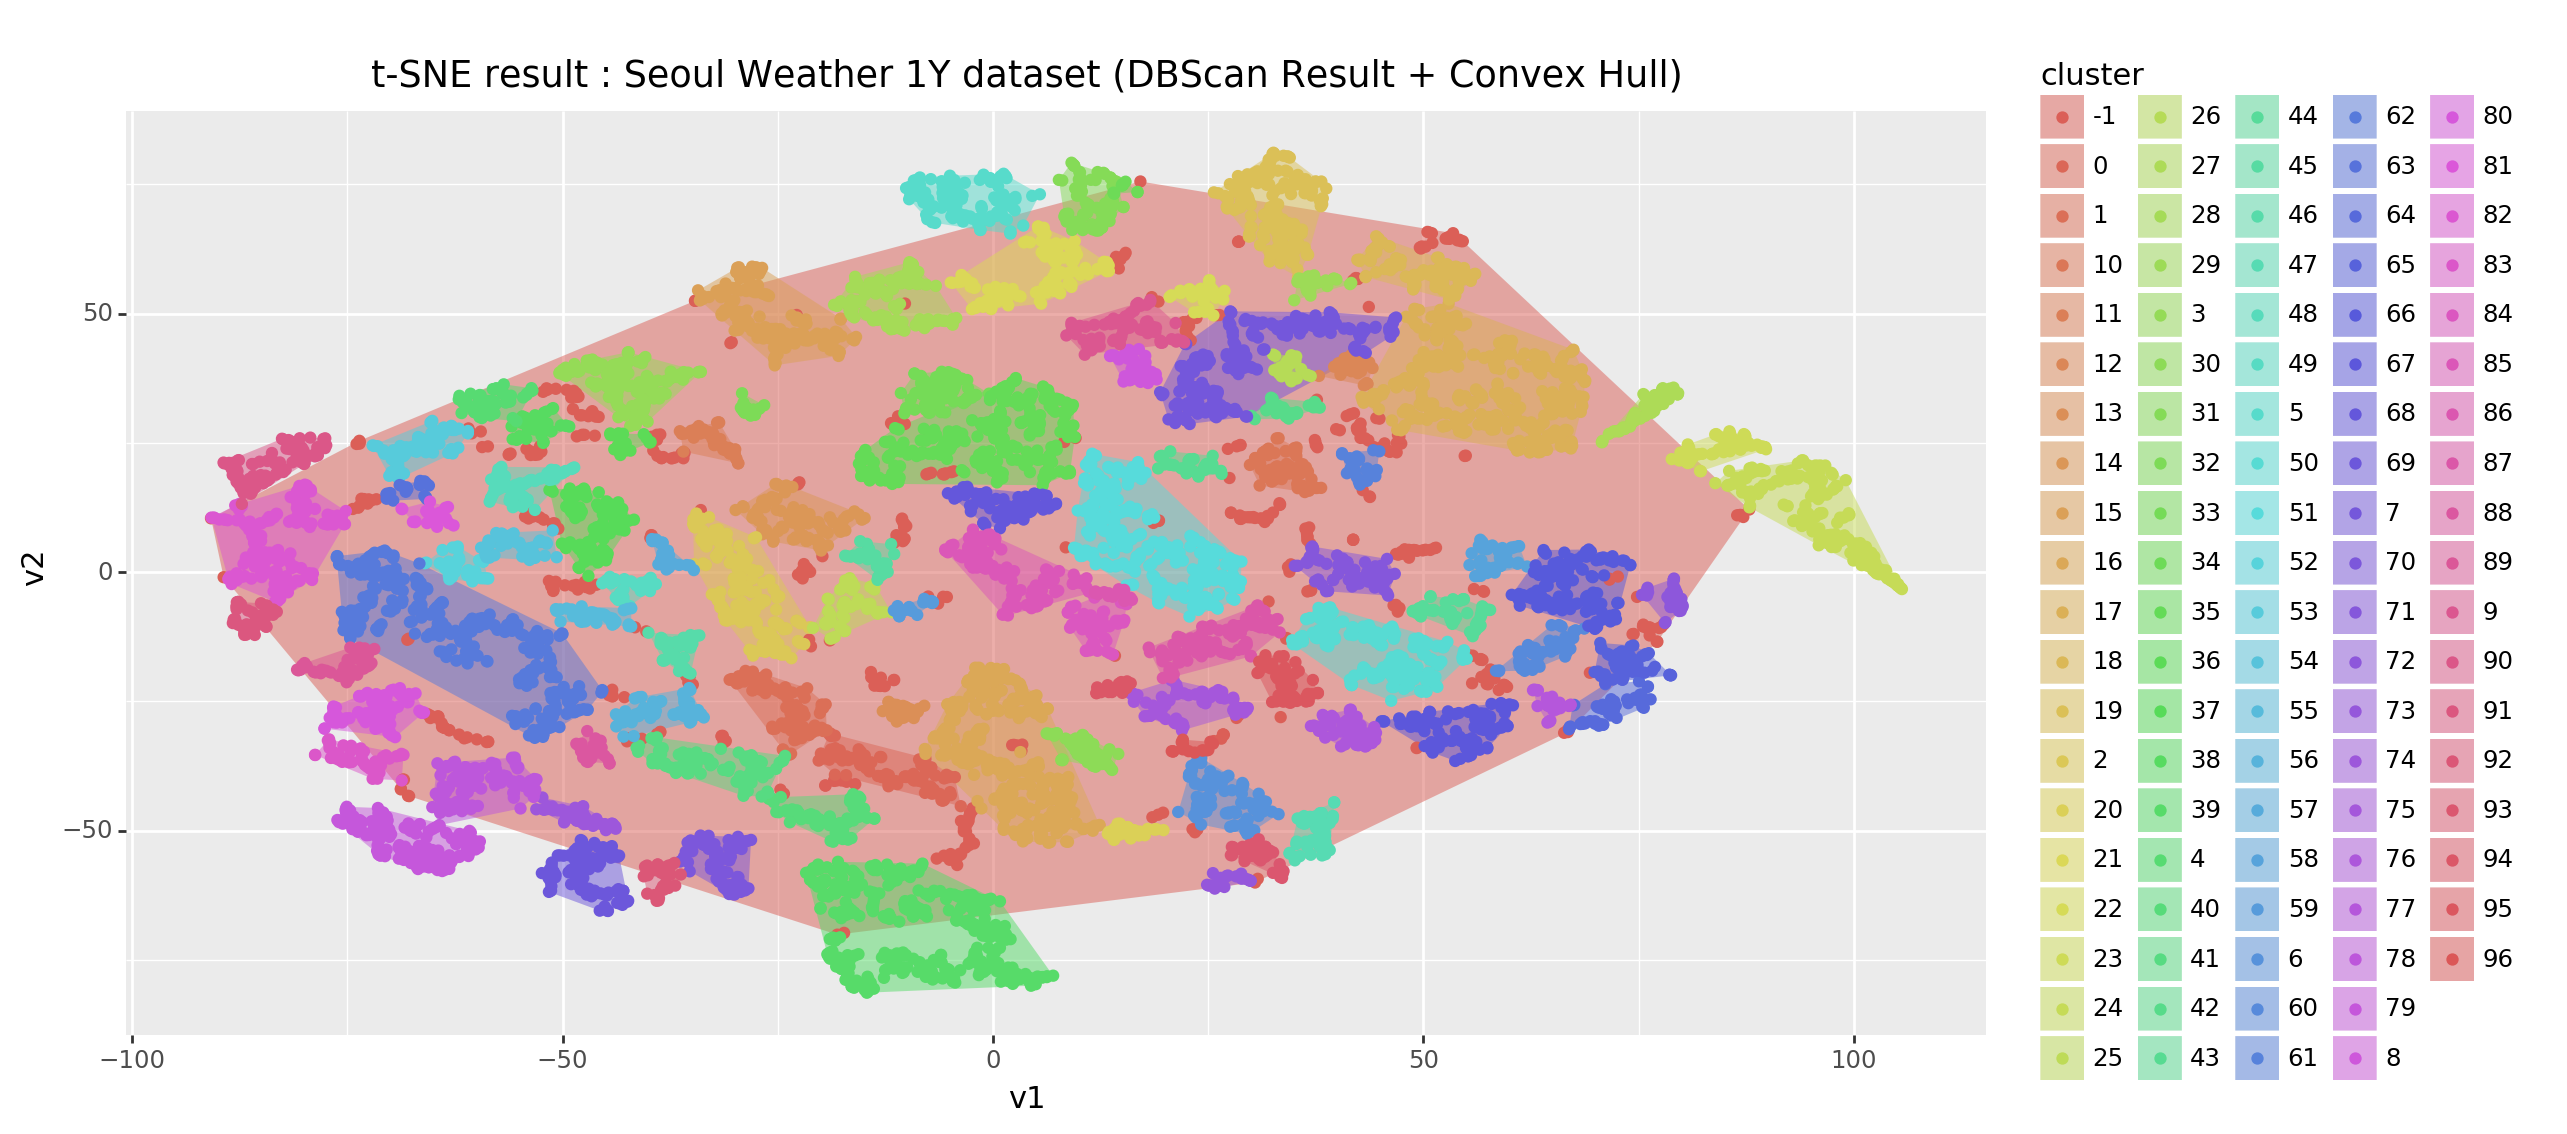

<ggplot: (-9223363249228765082)>

In [294]:
(df_chull_result
 .assign(cluster = lambda d: d['cluster'].astype('str') )
 .pipe(ggplot, aes(x='v1', y='v2')) +
 geom_polygon(aes(fill='cluster'), alpha=0.5) +
 geom_point(data=df_dbscan_result.assign(cluster = lambda d: d['cluster'].astype('str')),
           mapping=aes(color='cluster')) +
 ggtitle('t-SNE result : Seoul Weather 1Y dataset (DBScan Result + Convex Hull)') +
 theme(figure_size=(12,6))
)

### hierarchy clustering

In [389]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [390]:
hac = AgglomerativeClustering(linkage='ward', n_clusters=8)
hac.fit(X)
print(Counter(hac.labels_))

Counter({0: 2007, 2: 1963, 1: 1375, 7: 1257, 4: 1149, 6: 890, 3: 82, 5: 10})


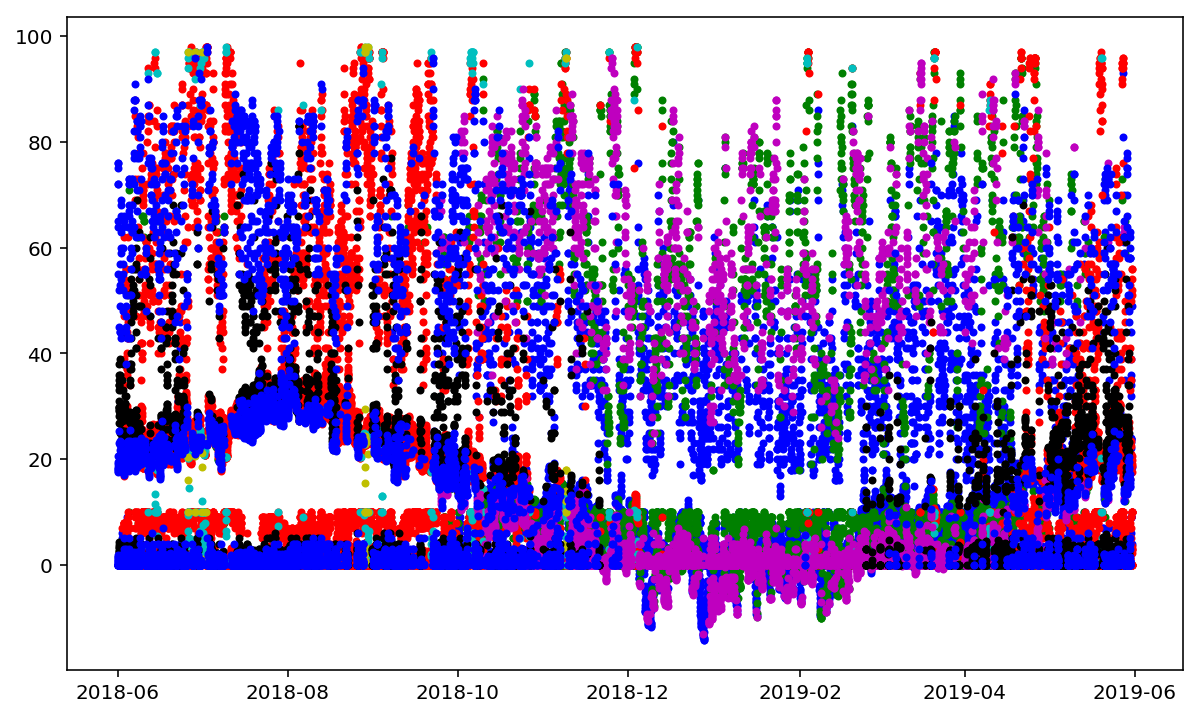

In [391]:
colors = ['b', 'g','r','c','m','y','k']*3
plt.figure(figsize=(10,6))
for idx_cluster in range(hac.n_clusters):
    plt.plot(data[hac.labels_ == idx_cluster], colors[idx_cluster]+'.')

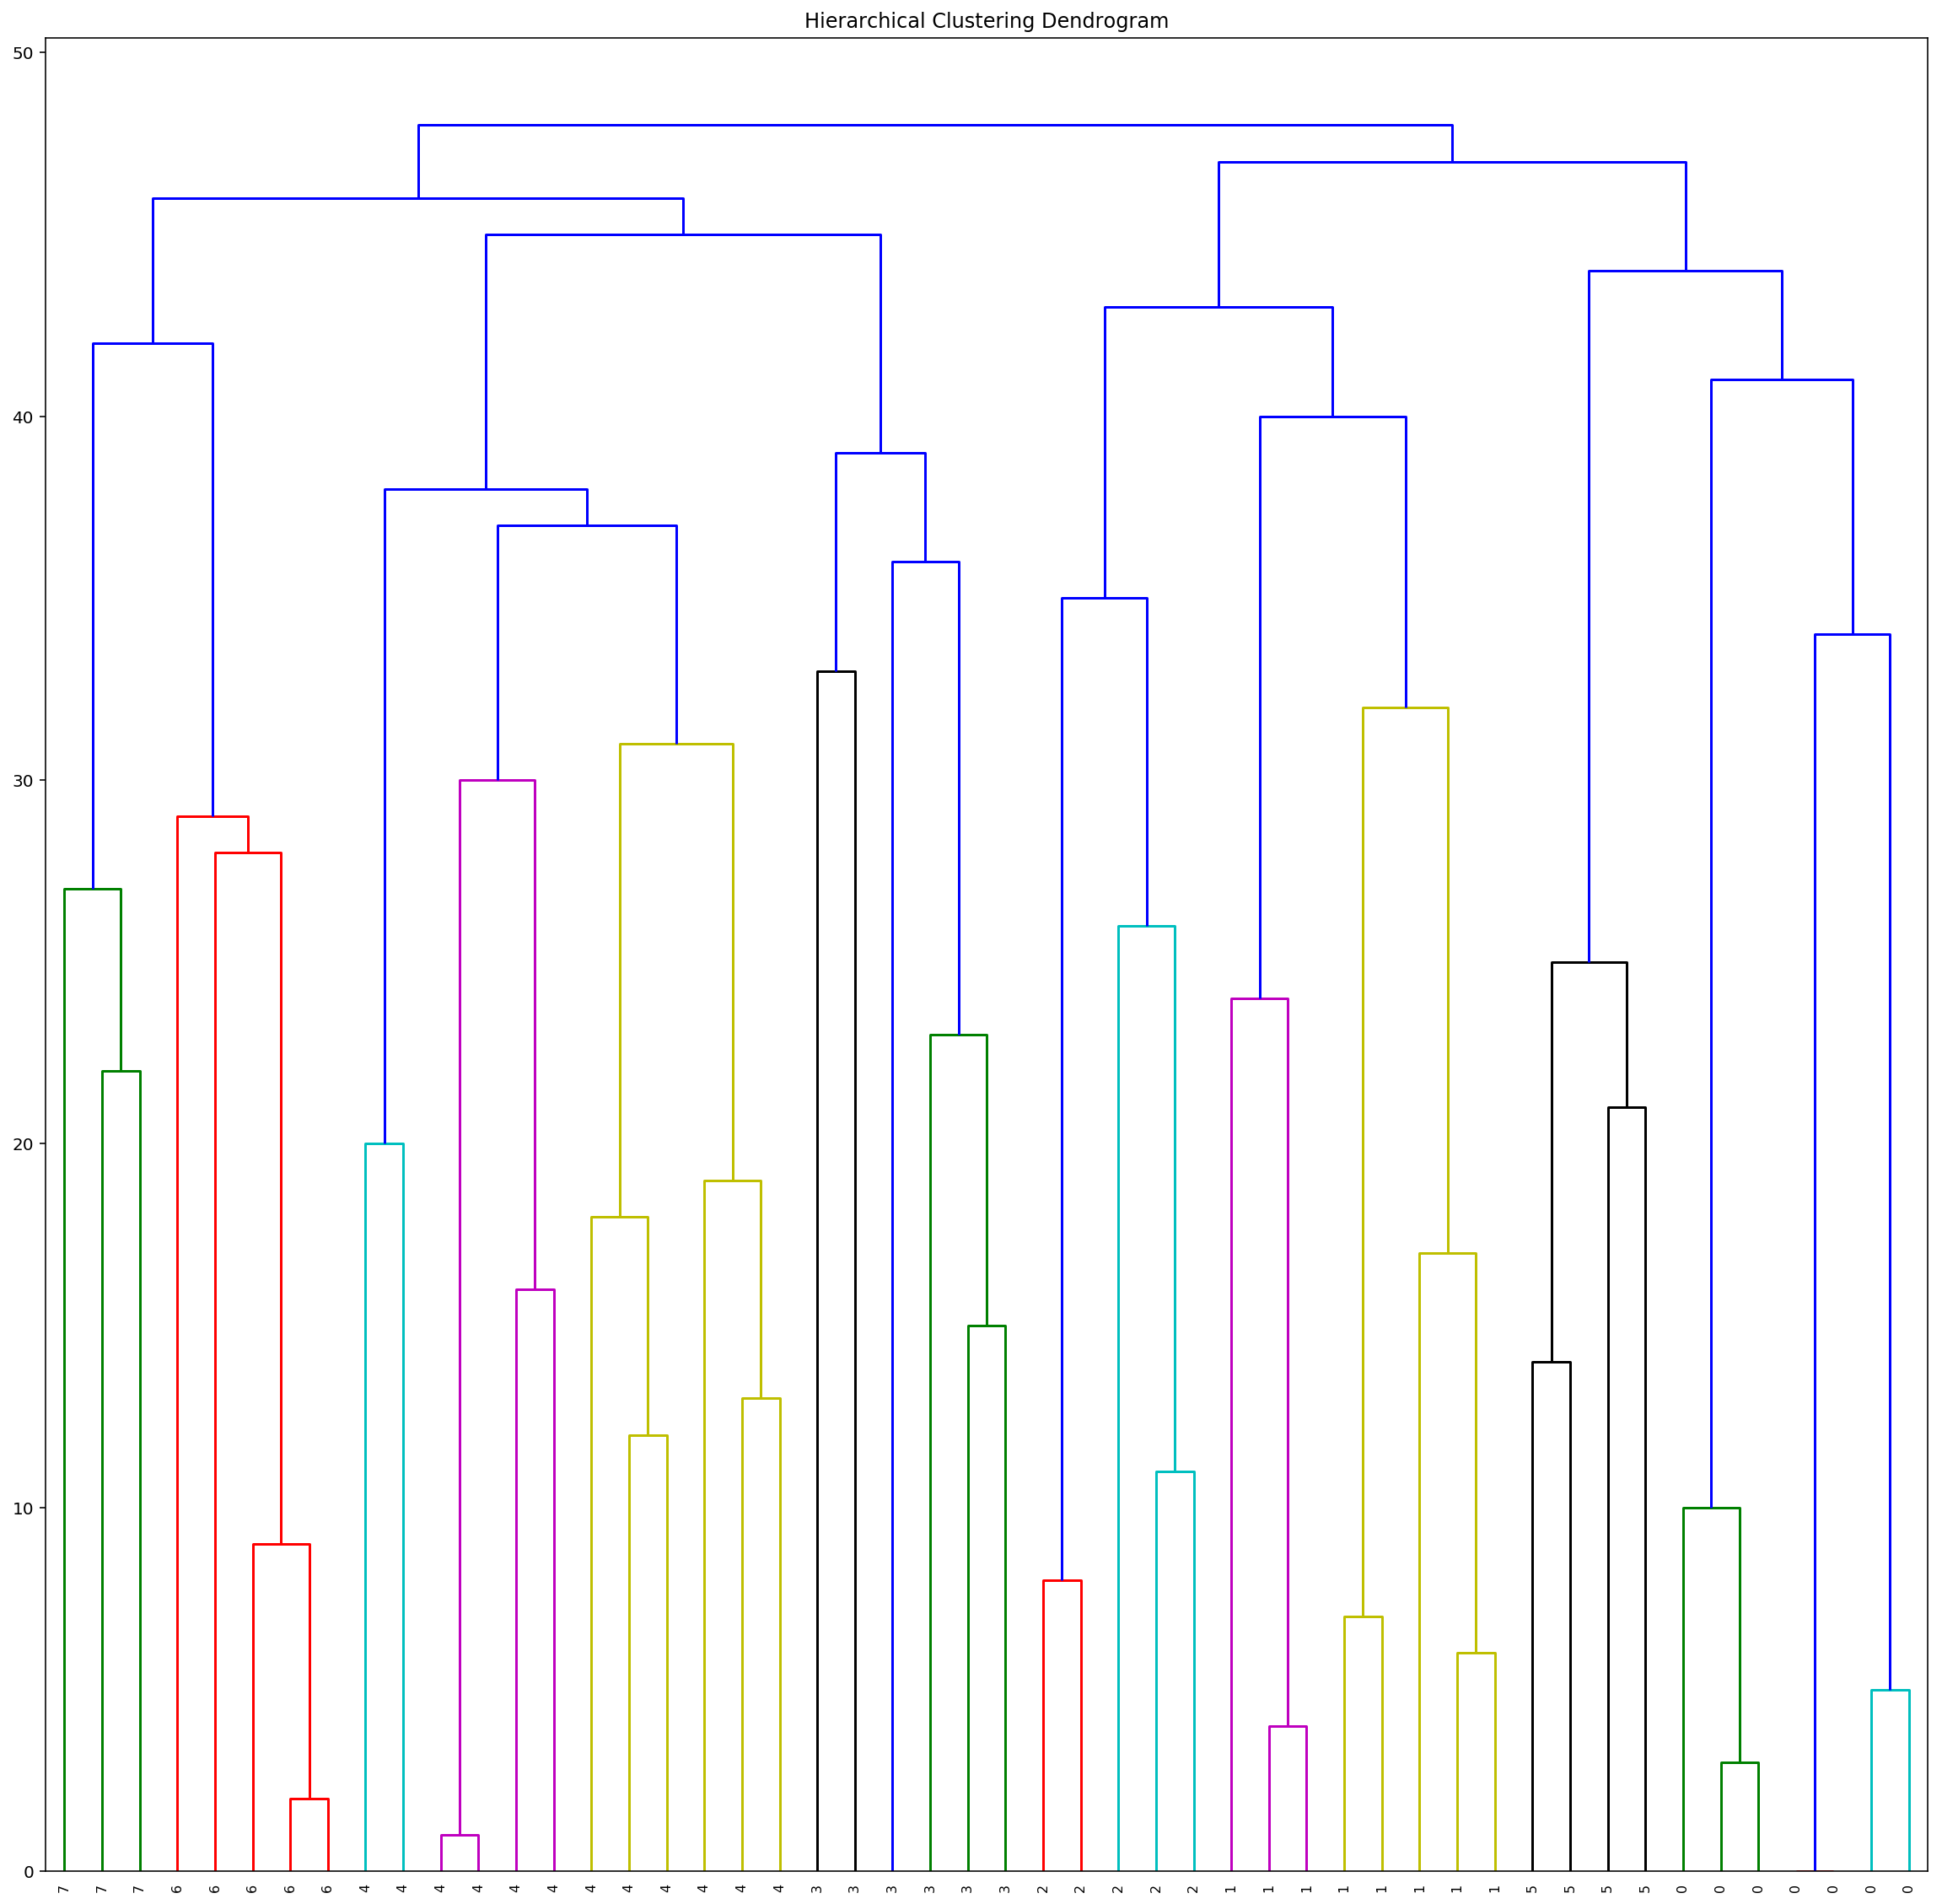

In [392]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hac.fit(data[:50])
#hac.fit(X[:50])
#hac.fit(X)

plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hac, labels=hac.labels_)
plt.show()